In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [24]:
# Loading the csv data to a Pandas DataFrame
gld_price = pd.read_csv('gold_price_data.csv')

In [25]:
# print first 5 rows in the dataframe
gld_price.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [26]:
# print last 5 rows in the dataframe
gld_price.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [27]:
# Getting the shape of the data
gld_price.shape

(2290, 6)

In [28]:
# Getting the information about the data
gld_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [29]:
# Getting the statistical measures of the data
gld_price.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [30]:
# Checking the number of existing values
gld_price.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

Correlation:-


1.   Positive Correlation
2.   Negetive Correlation



In [31]:
correlation = gld_price.corr()

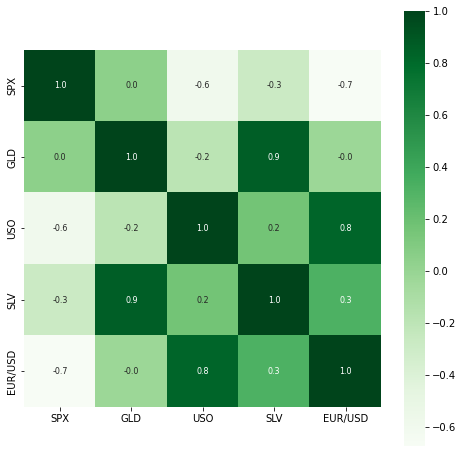

In [41]:
# Constructing the heatmap to understand the correlation
plt.figure(figsize = (8,8))
sb.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Greens')


In [44]:
# Correlation Values of Gold
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


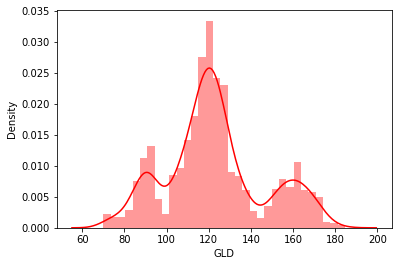

In [49]:
# Distribution of Gold Plot
sb.distplot(gld_price['GLD'], color='red')

### Splitting the Features and Target

In [51]:
X = gld_price.drop(['Date','GLD'],axis=1)
Y = gld_price['GLD']

In [54]:
print(X)

print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Traing Data and Testing Data 

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=2)

In [61]:
print(X_train)

print(X_test)

print(Y_train)

print('\n',Y_test)

              SPX        USO        SLV   EUR/USD
476   1138.500000  39.790001  16.889999  1.361693
1958  2202.939941  10.630000  15.800000  1.063886
248    700.820007  24.480000  12.770000  1.256408
2231  2656.000000  11.890000  15.570000  1.225280
1325  1838.880005  33.040001  19.420000  1.366998
...           ...        ...        ...       ...
1071  1409.150024  32.320000  32.980000  1.287515
433   1132.989990  40.270000  17.230000  1.442398
674   1286.119995  38.610001  27.389999  1.357276
1099  1461.890015  33.919998  29.180000  1.306745
1608  2092.429932  18.500000  15.600000  1.057295

[1832 rows x 4 columns]
              SPX        USO        SLV   EUR/USD
903   1351.949951  38.330002  32.900002  1.324854
129   1271.510010  93.900002  13.450000  1.472581
1787  1880.050049   8.910000  14.340000  1.119996
1913  2181.300049  10.960000  18.620001  1.127142
2048  2352.949951  10.680000  17.320000  1.067247
...           ...        ...        ...       ...
923   1370.869995  41.090

## Model Training

In [62]:
regressor = RandomForestRegressor(n_estimators=100)

In [64]:
# Training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

## Model Evaluation

In [67]:
# Prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [69]:
print(test_data_prediction)

[168.54679904  82.18399991 116.10780012 127.69030073 120.71270111
 154.84779738 150.09639875 126.14440078 117.56189864 125.85800112
 116.72000098 172.25460065 141.7378986  167.95909905 115.15859999
 117.59490055 137.04940214 170.28180137 159.51620267 157.25510011
 155.15340004 125.33880037 175.37559913 156.58830371 125.18840034
  93.72329981  77.41989983 120.60920014 119.10749936 167.41380045
  88.0661003  125.30329983  91.20150097 117.75720025 121.10829892
 136.50410127 115.63260102 115.50790096 147.62179961 107.1356012
 104.30400251  87.22489812 126.48070034 117.75840014 152.70919923
 119.58990006 108.3934996  107.98099779  93.28010064 127.04309805
  74.64240033 113.62159903 121.24200051 111.20749893 118.83429897
 120.58549936 159.35640052 168.20030122 146.85219631  85.84999856
  94.41590014  86.89259854  90.70009999 118.99020085 126.47510093
 127.55510036 170.15980005 122.2452988  117.37379884  98.23840032
 168.28440101 142.69319802 132.13190224 121.26500234 121.66529932
 119.648500

In [72]:
# R squared error
erroe_score = metrics.r2_score(Y_test, test_data_prediction)
print('R squared error: ',erroe_score)

R squared error:  0.9890051701129658


Compare the Actual Values and Predicted Values in a Plot

In [73]:
Y_test = list(Y_test)

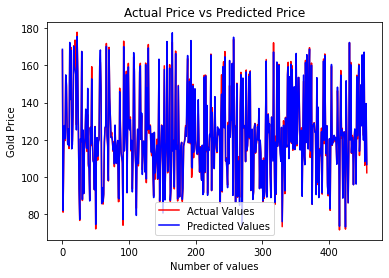

In [78]:
plt.plot(Y_test, color='red', label = 'Actual Values')
plt.plot(test_data_prediction, color='blue', label= 'Predicted Values')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()
